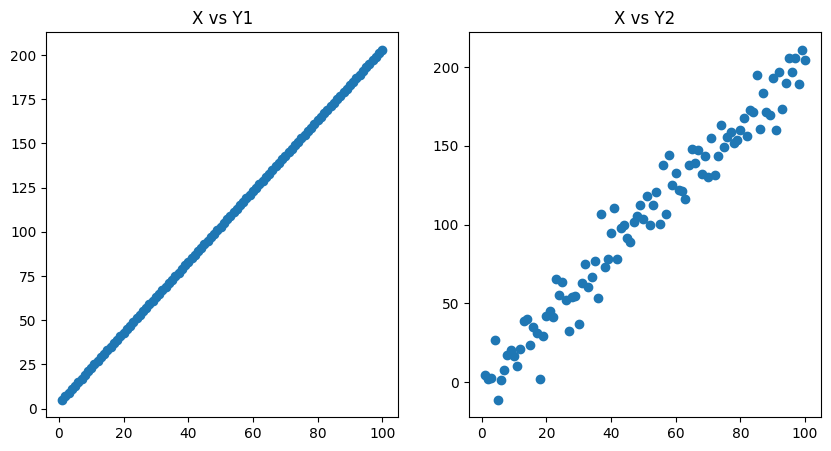

Pearson correlation for Y1: 1.0, Spearman correlation for Y1: 0.9999999999999999
Pearson correlation for Y2: 0.981488317445554, Spearman correlation for Y2: 0.9828262826282627
Is Pearson correlation for Y1 significant? False
Is Spearman correlation for Y1 significant? False
Is Pearson correlation for Y2 significant? False
Is Spearman correlation for Y2 significant? False


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import random

def create_datasets(k, a, b, sigma):
    X = np.linspace(1, k, k)
    Y1 = a * X + b
    Y2 = a * X + b + np.random.normal(0, sigma, k)
    return X, Y1, Y2

def plot_datasets(X, Y1, Y2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y1)
    plt.title('X vs Y1')
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y2)
    plt.title('X vs Y2')
    plt.show()

def calculate_correlation(X, Y):
    pearson_corr, _ = pearsonr(X, Y)
    spearman_corr, _ = spearmanr(X, Y)
    return pearson_corr, spearman_corr

def is_correlation_significant(X, Y, n=10000):
    pearson_corr, spearman_corr = calculate_correlation(X, Y)
    temp_corrs = []
    for _ in range(n):
        Y_temp = random.sample(list(Y), len(Y))
        temp_corr, _ = pearsonr(X, Y_temp)
        temp_corrs.append(temp_corr)
    lower, upper = np.percentile(temp_corrs, [2.5, 97.5])
    return lower <= pearson_corr <= upper, lower <= spearman_corr <= upper

# Create datasets
X, Y1, Y2 = create_datasets(100, 2, 3, 10)

# Plot datasets
plot_datasets(X, Y1, Y2)

# Calculate and print correlation coefficients
pearson_corr_Y1, spearman_corr_Y1 = calculate_correlation(X, Y1)
pearson_corr_Y2, spearman_corr_Y2 = calculate_correlation(X, Y2)
print(f'Pearson correlation for Y1: {pearson_corr_Y1}, Spearman correlation for Y1: {spearman_corr_Y1}')
print(f'Pearson correlation for Y2: {pearson_corr_Y2}, Spearman correlation for Y2: {spearman_corr_Y2}')

# Determine and print if correlations are significant
is_pearson_Y1_significant, is_spearman_Y1_significant = is_correlation_significant(X, Y1)
is_pearson_Y2_significant, is_spearman_Y2_significant = is_correlation_significant(X, Y2)
print(f'Is Pearson correlation for Y1 significant? {is_pearson_Y1_significant}')
print(f'Is Spearman correlation for Y1 significant? {is_spearman_Y1_significant}')
print(f'Is Pearson correlation for Y2 significant? {is_pearson_Y2_significant}')
print(f'Is Spearman correlation for Y2 significant? {is_spearman_Y2_significant}')